In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import time
import matplotlib.animation as animation

In [2]:
df = pd.read_csv("house_prices.csv")
df

,size,price
0,53,2380000.0
1,45,2310000.0
2,86,2930000.0
3,60,2470000.0
4,76,2480000.0
...,...,...
195,78,2370000.0
196,68,2560000.0
197,83,2990000.0
198,61,2570000.0


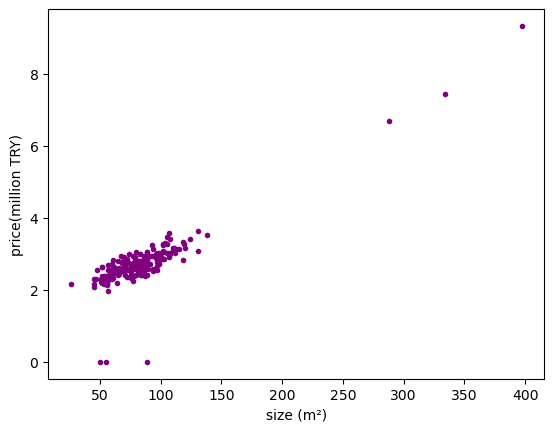

In [3]:
# very first analysis based on the plot
plt.scatter(df["size"], df["price"] / 1000000, marker=".", color="purple")
plt.xlabel("size (m²)")
plt.ylabel("price(million TRY)")

plt.show()

In [4]:
# null and quantiles
print(f"Null: {df['size'].isnull().sum()} \n")
print(df['size'].quantile([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]))

Null: 0 

0.00    -32.00
0.01    -12.16
0.05     50.95
0.10     53.00
0.20     60.00
0.30     66.70
0.50     79.50
0.60     84.00
0.70     89.00
0.80     97.40
0.90    108.20
0.95    118.00
0.99    288.46
1.00    397.00
Name: size, dtype: float64


In [5]:
# null and quantiles 2
print(f"Null: {df['price'].isnull().sum()} \n")
df['price'].quantile([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

Null: 3 



0.00         90.0
0.01         90.0
0.05    2178000.0
0.10    2306000.0
0.20    2412000.0
0.30    2530000.0
0.50    2660000.0
0.60    2766000.0
0.70    2860000.0
0.80    2990000.0
0.90    3142344.0
0.95    3308000.0
0.99    6700800.0
1.00    9320000.0
Name: price, dtype: float64

In [6]:
# outlier removal
print(df.shape)
df_scope = df[(df['size']>=df['size'].quantile(0.05)) & (df['size']<=df['size'].quantile(0.95))].copy()
df_scope.shape

(200, 2)


(181, 2)

In [7]:
# outlier removal 2
df_scope = df_scope[(df_scope['price']>=df['price'].quantile(0.05))].copy()
df_scope.shape

(175, 2)

In [8]:
# scaling price
df_scope['price'] = df_scope['price'] / 1000000 

In [9]:
# null value recheck
print("Null:", df_scope['price'].isnull().sum())

Null: 0


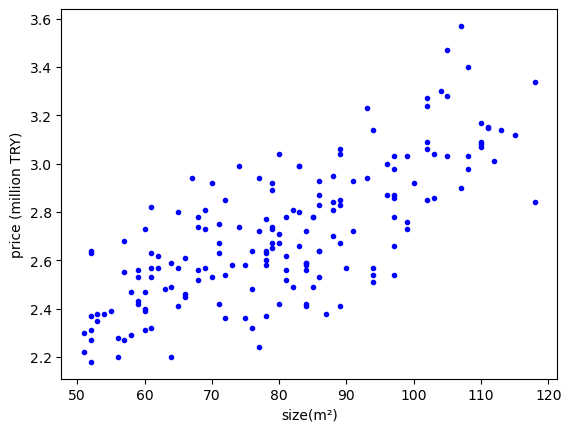

In [10]:
plt.scatter(df_scope['size'], df_scope['price'], marker=".", color="blue")
plt.xlabel("size(m²)")
plt.ylabel("price (million TRY)")
plt.show()

In [11]:
# regression matrix
X = np.zeros((df_scope.shape[0], 2))
X[:, 0] = 1
X[:, 1] = df_scope['size']
X

array([[  1.,  53.],
       [  1.,  86.],
       [  1.,  60.],
       [  1.,  76.],
       [  1.,  97.],
       [  1.,  74.],
       [  1.,  52.],
       [  1.,  97.],
       [  1.,  61.],
       [  1.,  97.],
       [  1.,  94.],
       [  1.,  86.],
       [  1.,  97.],
       [  1.,  72.],
       [  1.,  84.],
       [  1.,  69.],
       [  1.,  52.],
       [  1.,  78.],
       [  1.,  52.],
       [  1.,  64.],
       [  1.,  67.],
       [  1.,  57.],
       [  1.,  66.],
       [  1.,  52.],
       [  1.,  58.],
       [  1.,  71.],
       [  1.,  89.],
       [  1.,  93.],
       [  1.,  85.],
       [  1.,  52.],
       [  1.,  99.],
       [  1., 105.],
       [  1.,  78.],
       [  1., 103.],
       [  1., 112.],
       [  1.,  60.],
       [  1.,  82.],
       [  1.,  60.],
       [  1.,  99.],
       [  1.,  64.],
       [  1.,  79.],
       [  1.,  80.],
       [  1.,  86.],
       [  1.,  80.],
       [  1.,  88.],
       [  1.,  79.],
       [  1.,  84.],
       [  1.,

In [12]:
# target vector
y = np.zeros((df_scope.shape[0], 1))
y[:, 0] = df_scope['price']
y

array([[2.38   ],
       [2.93   ],
       [2.47   ],
       [2.48   ],
       [3.03   ],
       [2.74   ],
       [2.18   ],
       [2.78   ],
       [2.32   ],
       [2.87   ],
       [3.13738],
       [2.83   ],
       [2.66   ],
       [2.36   ],
       [2.59   ],
       [2.57   ],
       [2.27   ],
       [2.77   ],
       [2.37   ],
       [2.49   ],
       [2.94   ],
       [2.27   ],
       [2.46   ],
       [2.31   ],
       [2.29   ],
       [2.67   ],
       [3.04   ],
       [3.23   ],
       [2.78   ],
       [2.63   ],
       [2.73   ],
       [3.47   ],
       [2.6    ],
       [2.86   ],
       [3.01   ],
       [2.4    ],
       [2.81   ],
       [2.39   ],
       [3.03   ],
       [2.2    ],
       [2.67   ],
       [2.42   ],
       [2.64   ],
       [2.71   ],
       [2.84   ],
       [2.65   ],
       [2.56   ],
       [3.07   ],
       [2.81   ],
       [2.42   ],
       [2.62   ],
       [2.53   ],
       [2.76   ],
       [2.59   ],
       [2.57   ],
       [3.

In [13]:
# θ = (XᵀX)⁻¹Xᵀy the normal equation
A = np.matmul(X.T, X)
B = np.linalg.inv(A)
C = np.matmul(B, X.T)
theta_optimal = np.matmul(C, y)
print("Optimal beta:", theta_optimal)

Optimal beta: [[1.72895565]
 [0.01219227]]


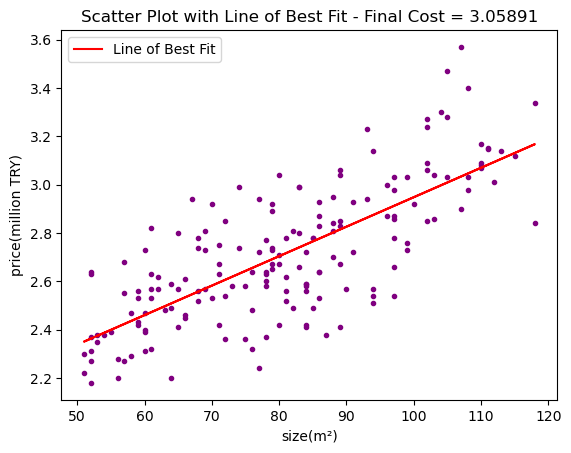

In [14]:
# plotting the line of best fit
line = theta_optimal[0] + theta_optimal[1] * df_scope['size']

y_predicted = np.matmul(X, theta_optimal)
error = y - y_predicted
gradient = -np.sum(error * X, axis = 0).reshape(2, 1)   
cost = 0.5 * sum(error ** 2)[0]

plt.scatter(df_scope['size'], df_scope['price'], marker=".", color="purple")
plt.plot(df_scope['size'], line, color="red", label="Line of Best Fit")
plt.xlabel("size(m²)")
plt.ylabel('price(million TRY)')
plt.title("Scatter Plot with Line of Best Fit - Final Cost = {:.5f}".format(cost))
plt.legend()
plt.show()
del (A, B, C, cost, df, error, gradient, line, y_predicted)

In [ ]:
# least mean square
theta_init = np.array([[-0.2],[-0.02]])
theta_init.shape

(2, 1)

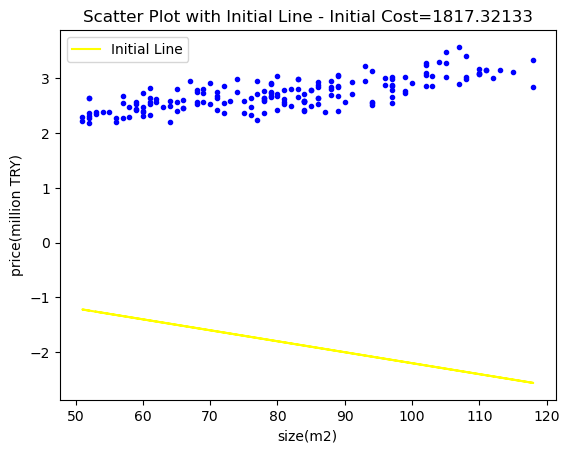

In [41]:
line = theta_init[0] + theta_init[1] * df_scope['size']

y_predicted = np.matmul(X,theta_init)
error = y - y_predicted
gradient = -np.sum(error*X,axis=0).reshape(2,1)   
cost = 0.5*sum(error**2)[0]


plt.scatter(df_scope['size'],df_scope['price'],marker='.',color='blue')
plt.plot(df_scope['size'], line, color='yellow', label='Initial Line')
plt.xlabel('size(m2)')
plt.ylabel('price(million TRY)')
plt.title("Scatter Plot with Initial Line - Initial Cost={:.5f}".format(cost))
plt.legend()
plt.show()
del(line,y_predicted,error,gradient,cost)

In [42]:
alpha = 0.000001

In [ ]:
theta = theta_init
l_results = []
for iter in range(1000000):
    y_predicted = np.matmul(X,theta)
    error = y - y_predicted
    gradient = -np.sum(error*X,axis=0).reshape(2,1)   
    cost = 0.5*sum(error**2)[0]
    l_results.append((cost,theta))
    theta = theta - alpha*gradient

#del(iter, y_predicted, error, gradient, cost, theta)

In [19]:
who

LinearLocator	 X	 alpha	 animation	 cm	 cost	 df_scope	 error	 gradient	 
iter	 l_results	 math	 np	 pd	 plt	 theta	 theta_init	 theta_optimal	 
time	 y	 y_predicted	 


MovieWriter PillowWriter unavailable; using Pillow instead.


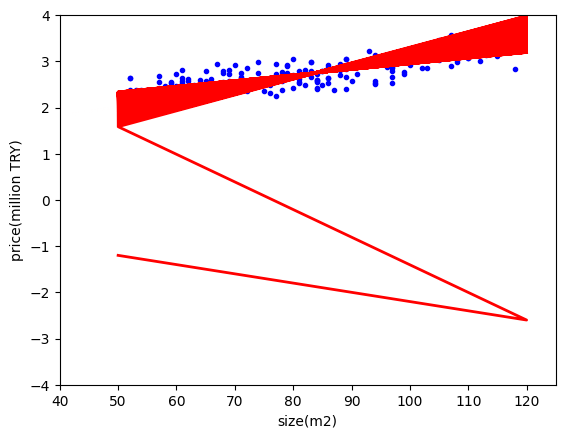

In [20]:
nbr_frames = 200

# creating a blank window
# for the animation 
fig = plt.figure() 
axis = plt.axes(xlim =(40, 125),
                ylim =(-4, 4)) 

plt.scatter(df_scope['size'],df_scope['price'],marker='.',color='blue')
plt.xlabel('size(m2)')
plt.ylabel('price(million TRY)')


line, = axis.plot([], [], color='red', lw = 2) 
 
def init(): 
    line.set_data([], []) 
    return line, 
 
xdata, ydata = [], [] 
 
# animation function 
def animate(i): 
    # t is a parameter which varies
    # with the frame number
    ii = math.floor(i*len(l_results)/nbr_frames)
    theta = l_results[ii][1]

    # x, y values to be plotted 
    x = np.linspace(50, 120, 100) 
    y = theta[0] + theta[1] * x 

    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    
    return line,
 
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames = nbr_frames, interval = 200, blit = True) 
 
# saves the animation in our desktop
anim.save('animation.gif', writer='PillowWriter', fps=30)


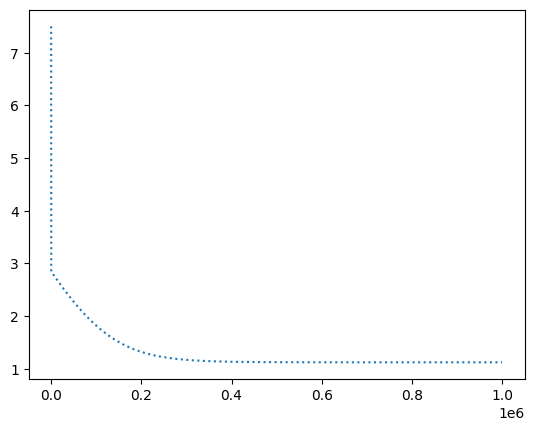

In [21]:
plt.plot([math.log(cost) for cost,_ in l_results], linestyle = 'dotted')
#plt.plot([cost for cost,_ in l_results], linestyle = 'dotted')
plt.show()

In [22]:
optimal_cost_SGD = math.inf
for cost, theta in l_results:
    if cost < optimal_cost_SGD:
        optimal_cost_SGD = cost
        optimal_theta_SGD = theta

print(optimal_cost_SGD,optimal_theta_SGD)

3.0589177512436323 [[1.72801644]
 [0.01220344]]


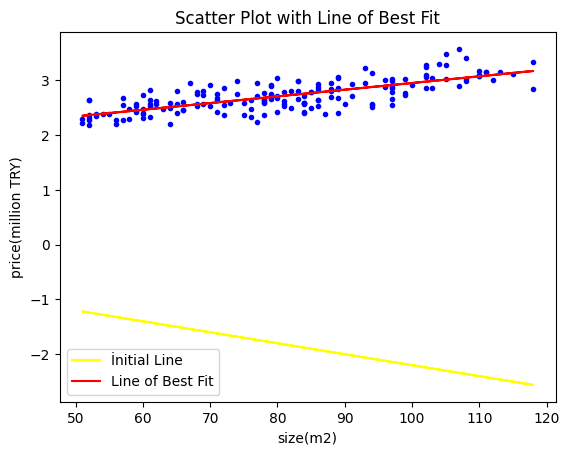

In [23]:
line_init = theta_init[0] + theta_init[1] * df_scope['size']
line = optimal_theta_SGD[0] + optimal_theta_SGD[1] * df_scope['size']

plt.scatter(df_scope['size'],df_scope['price'],marker='.',color='blue')
plt.plot(df_scope['size'], line_init, color='yellow', label='İnitial Line')
plt.plot(df_scope['size'], line, color='red', label='Line of Best Fit')
plt.xlabel('size(m2)')
plt.ylabel('price(million TRY)')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()